In [15]:
from pathlib import Path
path = Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset')

In [16]:
# Download dataset with Kaggle API
# ! kaggle datasets download lavaman151/plantifydr-dataset --unzip

In [17]:
from fastai.vision.all import *

In [18]:
path.ls()

(#10) [Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Bell pepper'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Corn'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Grape'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Strawberry'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Citrus'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Tomato'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Cherry'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Peach'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Potato'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Apple')]

In [19]:
plant_list = ['Apple','Bell pepper','Cherry','Citrus','Corn','Grape','Peach','Potato','Strawberry','Tomato']
plant = 'Apple'

In [20]:
model_path = Path(path/plant)

In [21]:
batch_tfms=[Normalize.from_stats(*imagenet_stats)]

In [22]:
dls = ImageDataLoaders.from_folder(path/plant,train='train',valid='valid',seed=1000,item_tfms=Resize(224),
                                   batch_tfms=batch_tfms,bs=64)

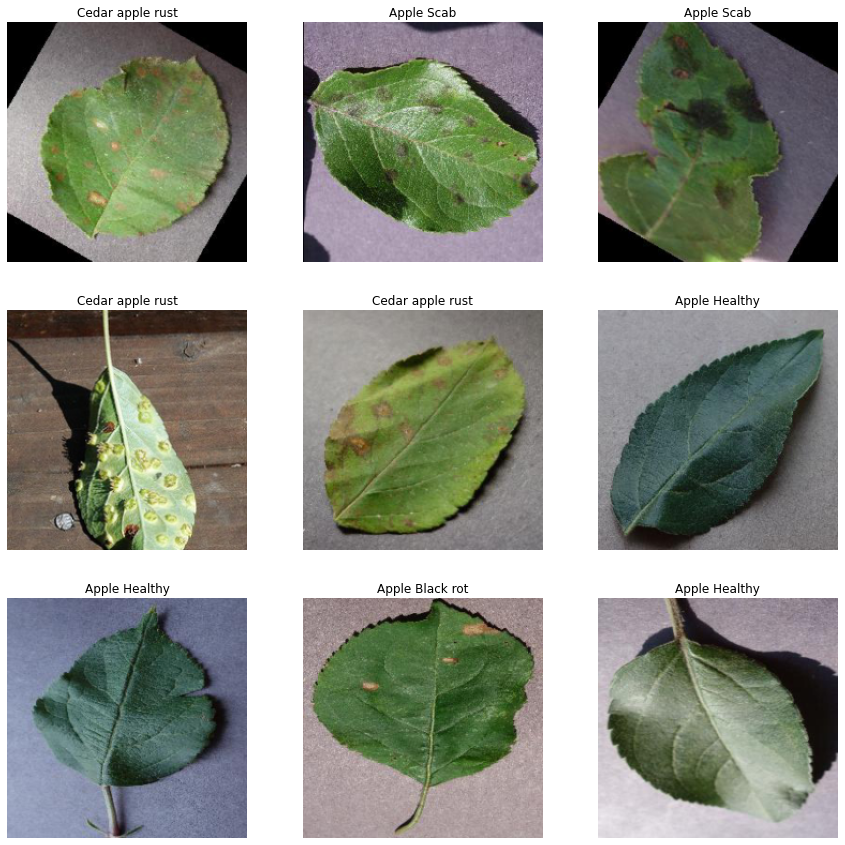

In [23]:
dls.show_batch(figsize=(15,15))

In [24]:
f1 = F1Score(average='weighted')

In [25]:
model_meta[resnet50]
body = create_body(resnet50, cut=None)

nc = dls.c
nf = num_features_model(body)
ps=0.5
lin_ftrs = None

head = create_head(nf, nc, lin_ftrs, ps=0.5)

In [33]:
learn = create_cnn_model(models.resnet50,n_out=dls.c)

In [27]:
head

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=4096, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=4, bias=False)
)

In [14]:
learn.load('/home/alilavaee/Desktop/plantifydr/TransferLearning/plant_leaf',strict=False)

RuntimeError: Error(s) in loading state_dict for Sequential:
	size mismatch for 1.8.weight: copying a param with shape torch.Size([2, 512]) from checkpoint, the shape in current model is torch.Size([4, 512]).

In [ ]:
model = xse_resnext50_deeper(n_out=dls.c)

In [ ]:
learn.fit_one_cycle(10)

In [ ]:
# learn = learn.to_fp32()